# Mall Customer Segmentation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/ervabilen/Desktop/Customer Segmentation Python Project/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df["Gender"] = df["Gender"].astype("category")

## Univariate Analysis

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


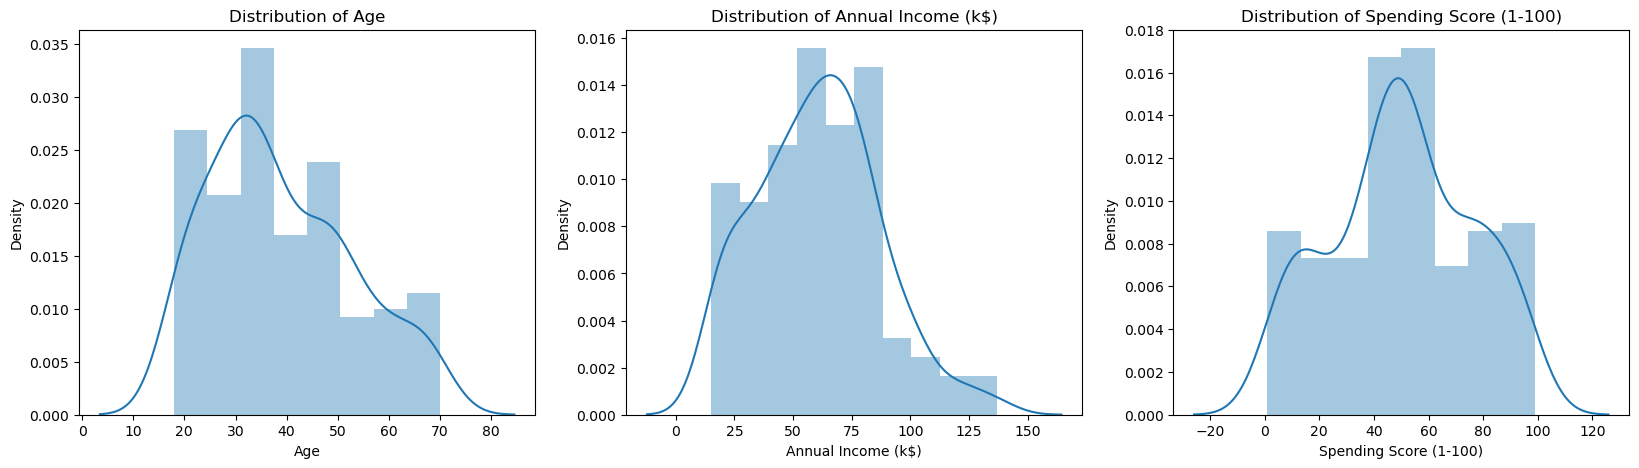

In [7]:
plt.figure(1 , figsize = (20 , 5))
n = 0
for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 3, n)
  sns.distplot(df[i])
  plt.title("Distribution of {}".format(i))
plt.show()

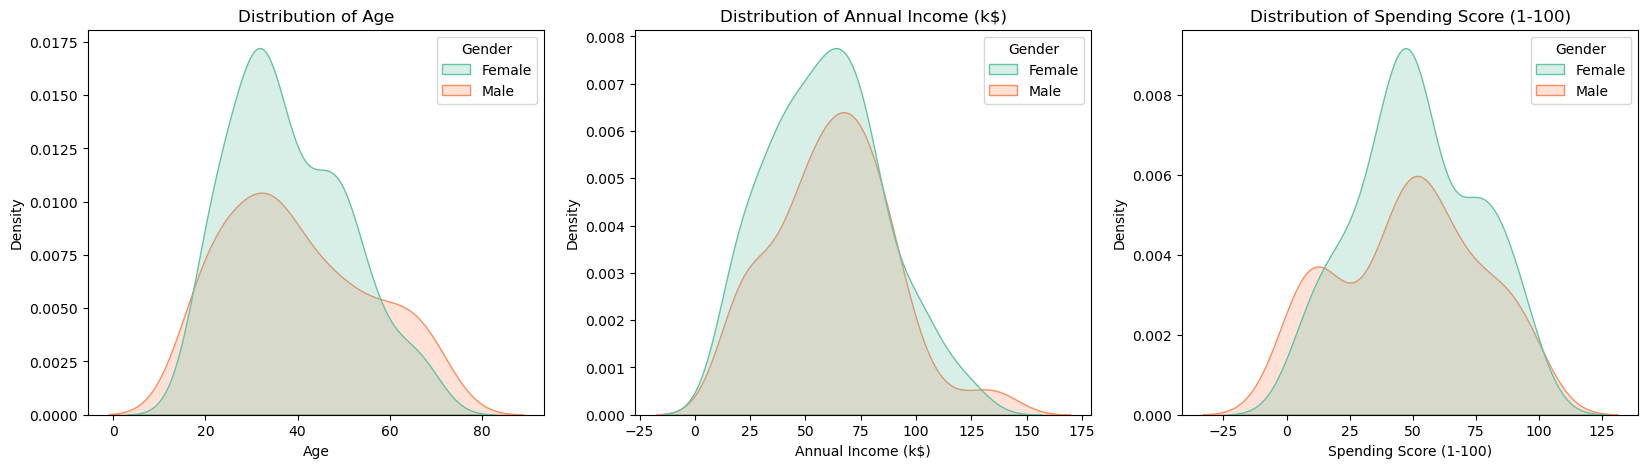

In [8]:
plt.figure(1 , figsize = (20 , 5))
n = 0
for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 3, n)
  sns.kdeplot(data=df, x=i, shade=True, hue='Gender', palette="Set2")
  plt.title("Distribution of {}".format(i))
plt.show()

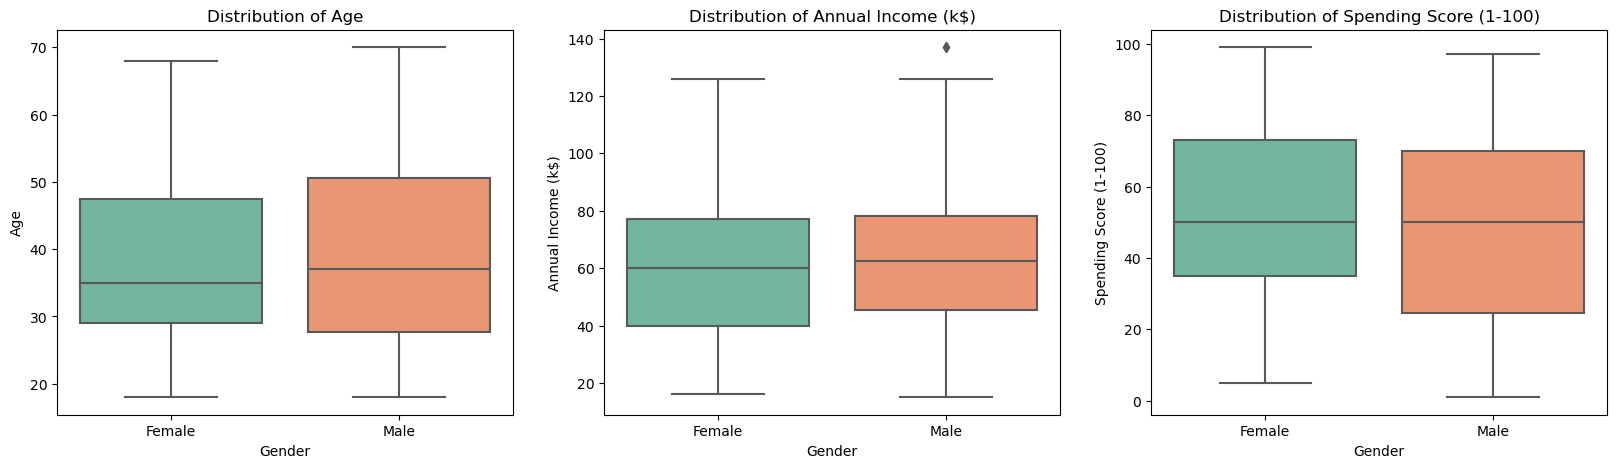

In [9]:
plt.figure(1 , figsize = (20 , 5))
n = 0
for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1, 3, n)
  sns.boxplot(data=df,x='Gender',y=df[i], palette="Set2")
  plt.title("Distribution of {}".format(i))
plt.show()

In [10]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

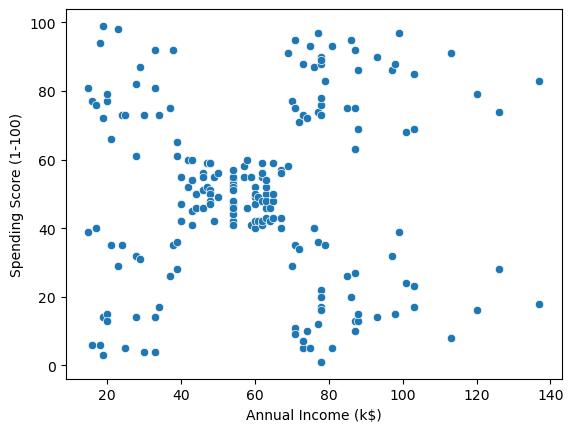

In [11]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)");

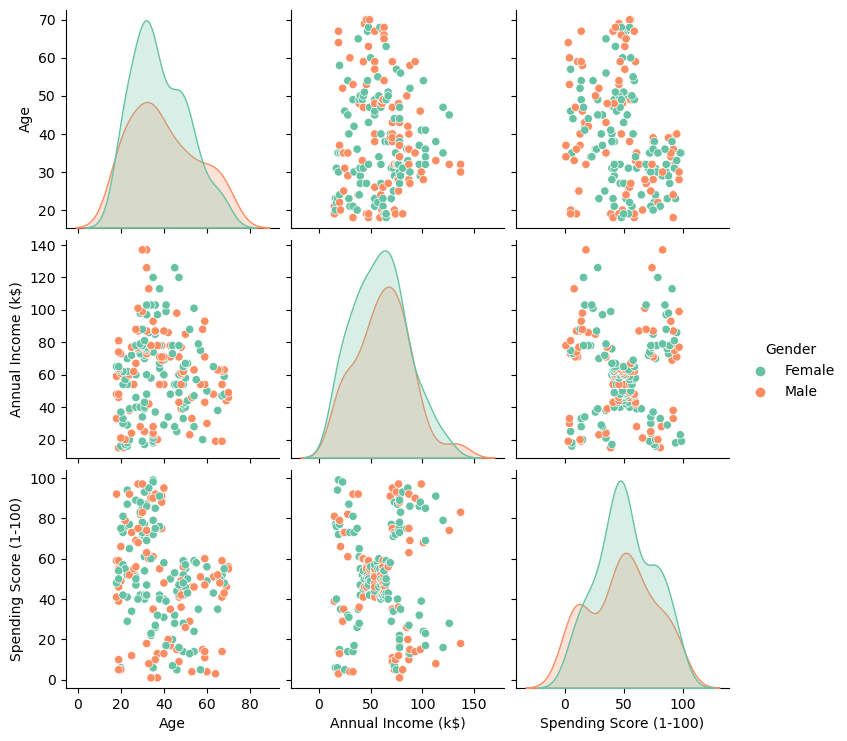

In [12]:
sns.pairplot(df,
             vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],
             hue="Gender",
            palette="Set2");

In [13]:
df.groupby(["Gender"])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


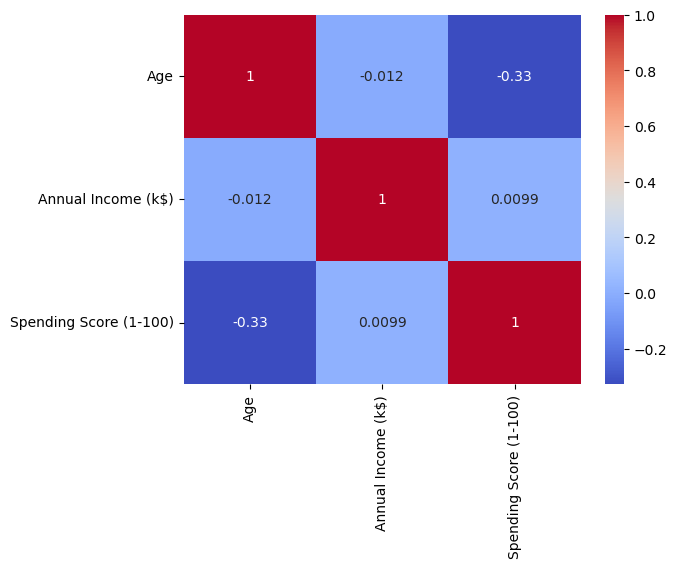

In [14]:
df1=df.drop('CustomerID',axis=1)
sns.heatmap(df1.corr(numeric_only = True), annot=True, cmap='coolwarm');

## Clustering - Univariate, Bivariate, Multivariate

In [15]:
clustering1 = KMeans(n_clusters=3)

In [16]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans(n_clusters=3)

In [17]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [18]:
df["Income Clusters"] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [19]:
df["Income Clusters"].value_counts()

Income Clusters
0    90
1    74
2    36
Name: count, dtype: int64

In [20]:
clustering1.inertia_

23517.330930930933

In [21]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

In [22]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913044,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 3977.1301587301587,
 2827.308424908425,
 2173.287445887446,
 1763.6207792207792]

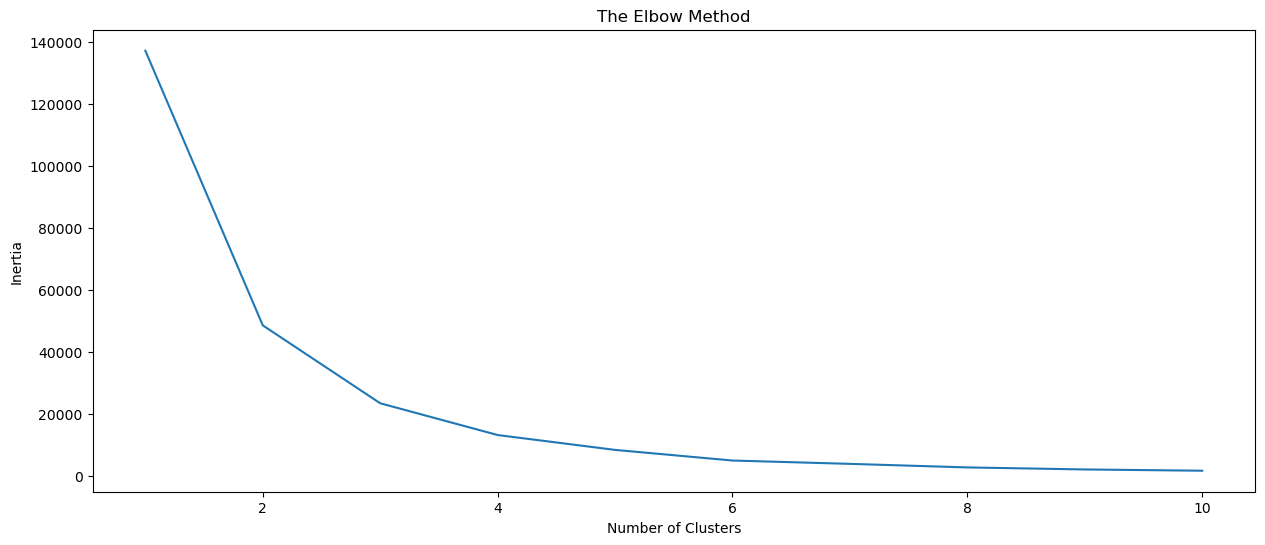

In [23]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11), inertia_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("The Elbow Method")
plt.show()

In [24]:
df.groupby(["Income Clusters"])[["Age", "Annual Income (k$)","Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Clusters,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [25]:
# Bivariate Clustering

In [26]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
df["Spending and Income Cluster"] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,0


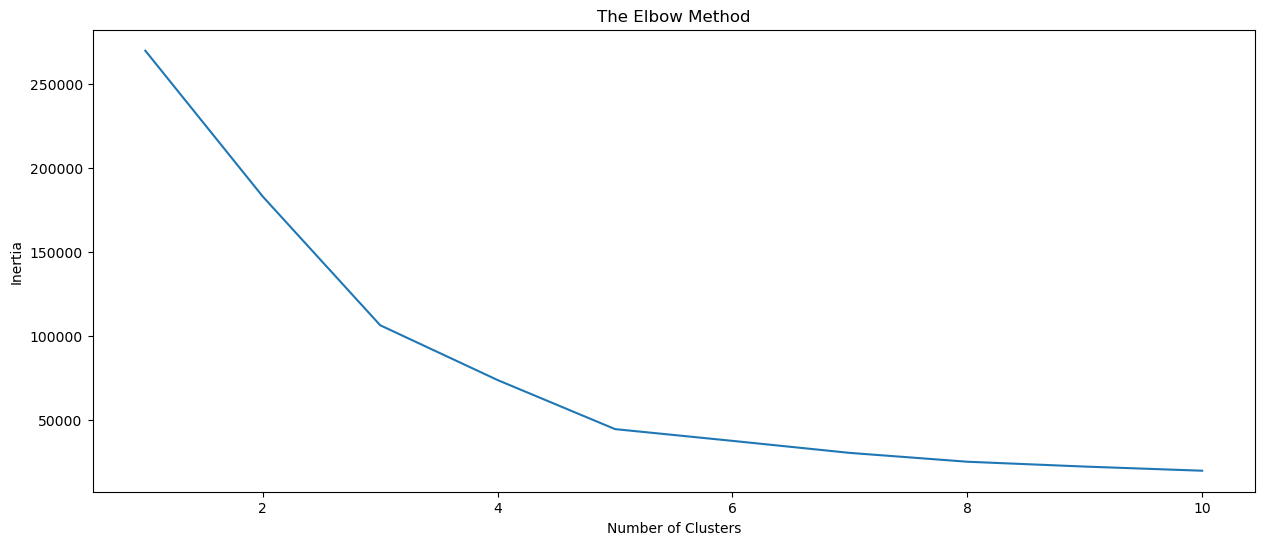

In [27]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
    inertia_scores2.append(kmeans2.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11), inertia_scores2)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("The Elbow Method")
plt.show()

In [28]:
clustering2.cluster_centers_

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571]])

In [29]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ["x", "y"]

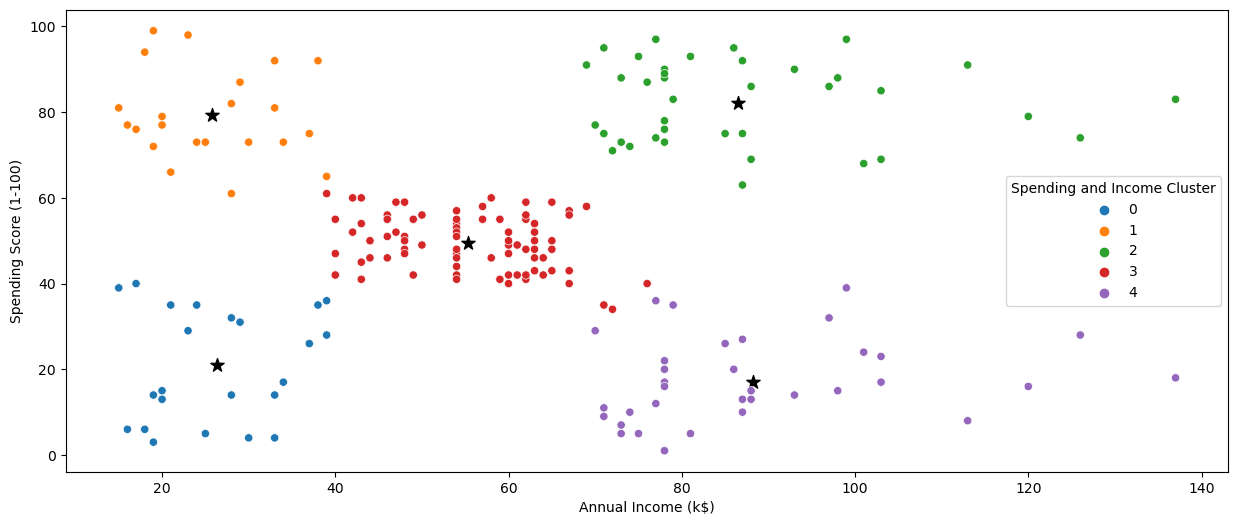

In [30]:
plt.figure(1 , figsize = (15 ,6))
plt.scatter(x=centers["x"], y=centers["y"], s=100, c="black", marker="*")
sns.scatterplot(data=df, 
                x="Annual Income (k$)", 
                y="Spending Score (1-100)", 
                hue="Spending and Income Cluster",
               palette="tab10")
plt.show()

In [31]:
pd.crosstab(df["Spending and Income Cluster"], df["Gender"], normalize="index")

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.590909,0.409091
2,0.538462,0.461538
3,0.592593,0.407407
4,0.457143,0.542857


In [32]:
df.groupby("Spending and Income Cluster")[["Age", "Annual Income (k$)","Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,41.114286,88.200000,17.114286


In [33]:
#Mulivariate Clustering 
from sklearn.preprocessing import StandardScaler

In [34]:
scale = StandardScaler()

In [35]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,0,True
1,2,21,15,81,1,1,True
2,3,20,16,6,1,0,False
3,4,23,16,77,1,1,False
4,5,31,17,40,1,0,False


In [36]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Clusters', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [37]:
dff = dff[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender_Male"]]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [39]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


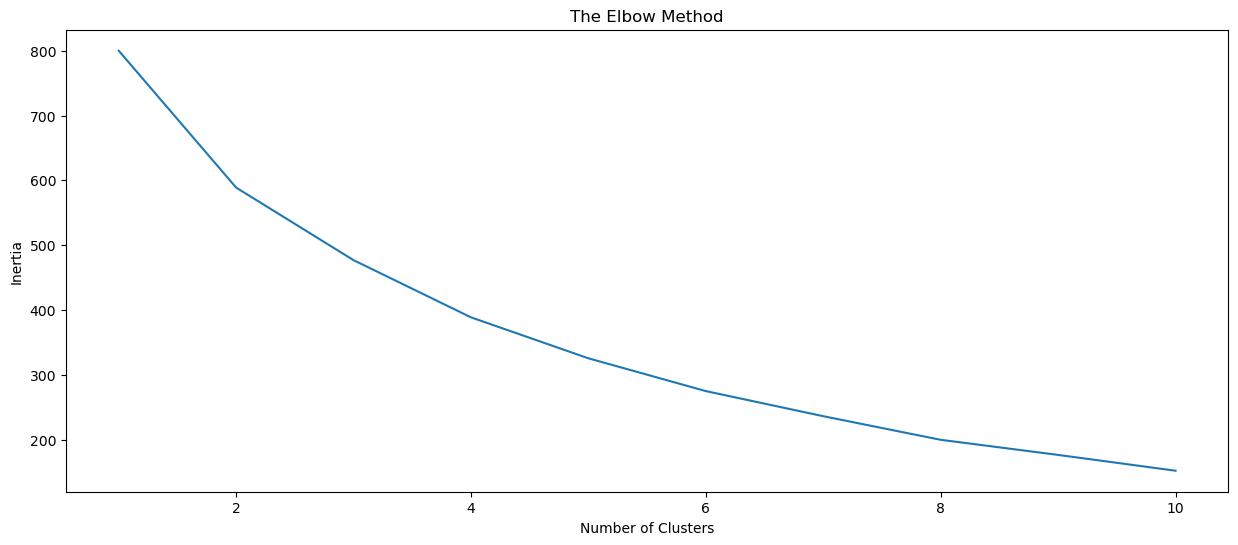

In [40]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11), inertia_scores3)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("The Elbow Method")
plt.show()

In [41]:
df.to_csv('Clustering.csv')